<u><b>Deep Learning : Principles and Practices - CSE1016 - L33 + L34</b></u>

<u><b>Name: </b></u> Gaurav Pendharkar

<u><b>Registration No: </b></u> 20BAI1153

<u><b>Lab - 4 : </b></u> MLP Implementation using Keras on MNIST

# Importing the required modules

In [1]:
# Modules used for data handling.
import pandas as pd
import numpy as np
from numpy import expand_dims

# Modules used for data visualization.
import seaborn as sns
import matplotlib.pyplot as plt

# Module used to perform random choice from an iterable.
import random as r

# Modules used to build the MLP architecture
import tensorflow.keras as tk
from keras.utils import np_utils 
from keras.models import Sequential 
from keras.layers import Dense, Activation

# Module used for data augmentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

sns.set_style()

In [2]:
# Centering all the output images in the notebook.
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Loading the dataset

In [3]:
(x_train, y_train), (x_test, y_test) = tk.datasets.mnist.load_data()

# Sample Images from the dataset

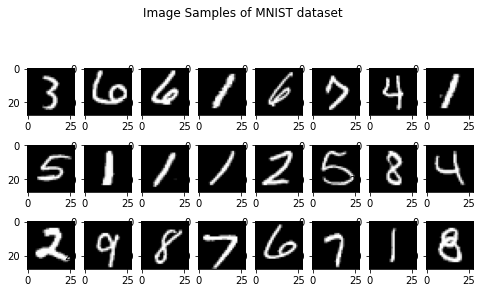

In [4]:
rows = 3
columns = 8
fig, axs = plt.subplots(rows, columns,figsize=(8,8))
for i in range(rows):
    for j in range(columns):
        axs[i,j].imshow(r.choice(x_train),cmap='gray')
fig.suptitle("Image Samples of MNIST dataset")
plt.subplots_adjust(bottom=0.5, top=0.9, hspace=0)
plt.show()

# Class Distribution

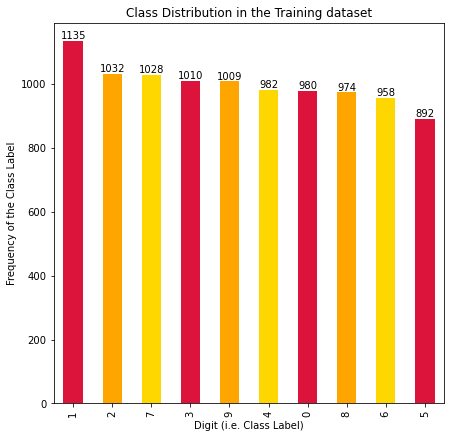

In [5]:
plt.figure(figsize=(7,7))
ax = pd.Series(y_test).value_counts().plot(kind="bar",
                                      color=["crimson","orange","gold"])
plt.title("Class Distribution in the Training dataset")
plt.xlabel("Digit (i.e. Class Label)")
plt.ylabel("Frequency of the Class Label")

for container in ax.containers:
    ax.bar_label(container)

plt.show()

There are maximum images of digit 1 which may lead to the model being biased to that class label. However, the other classes are uniformly distributed.

# Data Augmentation

In [24]:
class ImageDataAugmentation:
    
    def __init__(self, x_train, y_train, x_test, y_test, rotation_range, width_shift, height_shift, shear_range, zoom_range):
            self.x_train = x_train
            self.y_train = y_train
            self.x_test = x_test
            self.y_test = y_test
            self.rotation_range = rotation_range
            self.width_shift = width_shift
            self.height_shift = height_shift
            self.shear_range = shear_range
            self.zoom_range = zoom_range
            
    def fit_generator(self):
        self.datagen = ImageDataGenerator(rotation_range=self.rotation_range,
                                          width_shift_range=self.width_shift,
                                          height_shift_range=self.height_shift,
                                          zoom_range=self.zoom_range)
        self.datagen.fit(self.x_train.reshape(x_train.shape[0], 28, 28, 1))
    
    def display_samples(self, rows : int, cols : int):
        num = rows*cols
        fig, ax = plt.subplots(rows, cols, figsize=(8,8))
        self.x = self.datagen.flow(self.x_train.reshape(self.x_train.shape[0], 28, 28, 1),
                     self.y_train.reshape(self.y_train.shape[0], 1),
                     batch_size=num,
                     shuffle=False)
        for X, Y in self.x:
            for i in range(num):
                axis = ax[i//cols, i%cols]
                axis.imshow(X[i].reshape(28,28), cmap='gray')
                axis.set_title('Label: {}'.format(int(Y[i])))
            break
        plt.subplots_adjust(bottom=0.5, top=0.9, hspace=0.1)
        fig.suptitle("Image Samples of MNIST dataset after Augmentation")
        plt.show()

In [25]:
ida = ImageDataAugmentation(x_train, y_train, x_test, y_test, 30, 0.25, 0.25, 45, [0.5, 1.5])

In [26]:
ida.fit_generator()

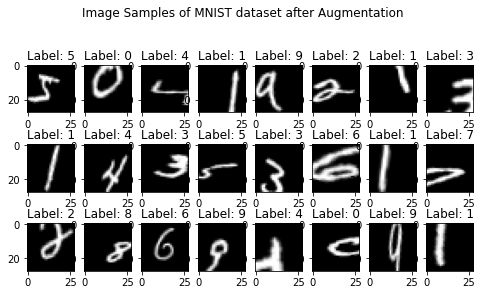

In [27]:
ida.display_samples(3,8)

# Multilayer Perceptron with data augmentation

In [145]:
class ModelBuilding:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.X_train = x_train
        self.Y_train = y_train
        self.X_test = x_test
        self.Y_test = y_test
    
    def preprocess_data(self):
        self.X_train = self.X_train.reshape(self.X_train.shape[0], self.X_train.shape[1]*self.X_train.shape[2]) 
        self.X_test = self.X_test.reshape(self.X_test.shape[0], self.X_test.shape[1]*self.X_test.shape[2])
        self.Y_train = np_utils.to_categorical(self.Y_train, 10)
        self.Y_test = np_utils.to_categorical(self.Y_test, 10)
        self.output_dim = 10
        self.input_dim = m.X_train.shape[1]
        self.batch_size = 128 
        self.nb_epoch = 20

    def build_model_1_layers(self):
        self.model = Sequential()
        self.model.add(Dense(512, activation='relu', input_shape=(self.input_dim,)))
        self.model.add(Dense(self.output_dim, activation='softmax'))
        self.model.summary()
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
    def build_model_2_layers(self):
        self.model = Sequential()
        self.model.add(Dense(512, activation='relu', input_shape=(self.input_dim,)))
        self.model.add(Dense(128, activation='relu'))
        self.model.add(Dense(self.output_dim, activation='softmax'))
        self.model.summary()
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
    def train_model(self):
        self.history = self.model.fit(self.X_train, self.Y_train, 
                                      batch_size=self.batch_size, 
                                      epochs=self.nb_epoch, verbose=1, 
                                      validation_data=(self.X_test, self.Y_test))
    
    def plot_history(self, title):
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.title(title)
        plt.ylabel('Accuracy')
        plt.xlabel('Epochs')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
    
    def evaluate_model(self):
        print("Test Dataset Loss: ", history.history['val_loss'])
        print("Test Dataset Accuracy: ",history.history['loss'])
        

# MLP Implementation

## Reshaping the input data

In [146]:
m = ModelBuilding(x_train, y_train, x_test, y_test)

In [147]:
m.preprocess_data()

## Model with one layer

### Building the model

In [148]:
m.build_model_1_layers()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 512)               401920    
                                                                 
 dense_28 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [149]:
m.train_model()

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 4.5690 - accuracy: 0.9068 - val_loss: 0.9706 - val_accuracy: 0.9430
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.6046 - accuracy: 0.9565 - val_loss: 0.6169 - val_accuracy: 0.9535
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2983 - accuracy: 0.9698 - val_loss: 0.5214 - val_accuracy: 0.9612
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2425 - accuracy: 0.9734 - val_loss: 0.5615 - val_accuracy: 0.9528
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1963 - accuracy: 0.9756 - val_loss: 0.4846 - val_accuracy: 0.9574
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1841 - accuracy: 0.9775 - val_loss: 0.4658 - val_accuracy: 0.9618
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1881 - accuracy: 0.9770 - val_loss: 0.4933 - val_accuracy: 0.9629
E

### Visualizing the model training history

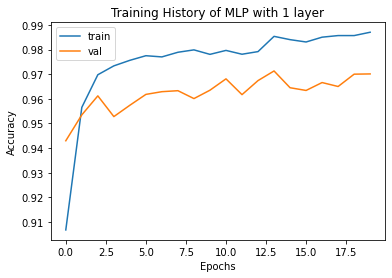

In [150]:
m.plot_history("Training History of MLP with 1 layer")

## Model with two layers

### Building the model

In [151]:
m.build_model_2_layers()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 512)               401920    
                                                                 
 dense_30 (Dense)            (None, 128)               65664     
                                                                 
 dense_31 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [152]:
m.train_model()

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 2.6051 - accuracy: 0.8454 - val_loss: 0.4100 - val_accuracy: 0.9016
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3013 - accuracy: 0.9232 - val_loss: 0.3099 - val_accuracy: 0.9260
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2166 - accuracy: 0.9427 - val_loss: 0.2614 - val_accuracy: 0.9347
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1685 - accuracy: 0.9556 - val_loss: 0.2422 - val_accuracy: 0.9442
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1453 - accuracy: 0.9615 - val_loss: 0.2252 - val_accuracy: 0.9489
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1205 - accuracy: 0.9664 - val_loss: 0.1994 - val_accuracy: 0.9561
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1007 - accuracy: 0.9718 - val_loss: 0.1637 - val_accuracy: 0.9615

### Visualizing the model training history

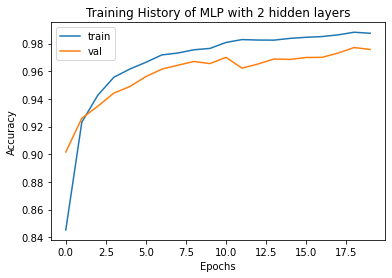

In [153]:
m.plot_history("Training History of MLP with 2 hidden layers")

# Conclusions and Inferences

- Each and every image in the dataset is a well-aligned image with proper image characteristics. However, if the orientation or other image properties are altered then the model does not generalize well.
- Hence, we use data augmentation to make the model more generalized to diverse set of images.
- The images were augmented and MLP with one layer and two layer were trained with their model history being plotted.
- MLP with two layers performs better than MLP with one layer. This clearly evident through the accuracies obtained as 97.57% and 97.01% respectively.
- Moreover, comparing the model training history of the two models, we can infer that the gap between train and validation accuracy is lower in a 2-layer MLP compared to a Single Layer MLP.